In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
dataset=pd.read_csv(r"C:\Users\A\Documents\flip robo\created\Dataset/CarPricePrediction_Dataset.csv")
dataset.head()

,Unnamed: 0,car_urls,brand,city,variant,price,run,fuel,Trans
0,0,https://www.cardekho.com/buy-used-car-details/...,2016 Honda Jazz,ahmedabad,V CVT,6.28 Lakh,"39,821 kms",Petrol,Automatic
1,1,https://www.cardekho.com/buy-used-car-details/...,2018 Mahindra Marazzo,ahmedabad,M8,10.15 Lakh,"41,071 kms",Diesel,Manual
2,2,https://www.cardekho.com/buy-used-car-details/...,2015 Hyundai Grand i10,ahmedabad,Sportz,4.51 Lakh,"67,525 kms",Petrol,Manual
3,3,https://www.cardekho.com/buy-used-car-details/...,2019 Jeep Compass,ahmedabad,1.4 Limited Plus BSIV,16.78 Lakh,"32,294 kms",Petrol,Automatic
4,4,https://www.cardekho.com/buy-used-car-details/...,2016 Honda Jazz,ahmedabad,1.2 V AT i VTEC,6.29 Lakh,"15,385 kms",Petrol,Automatic


In [3]:
def fun_year(x):
    a=int(x.split(' ')[0])
    return a
def fun_brand(x):
    a=x.split(' ')[1]
    return a
def fun_model(x):
    if len(x.split(' '))==3:
        a=x.split(' ')[2]
    elif len(x.split(' '))>3:
        a=x.split(' ')[2]+' '+x.split(' ')[3]
    return a

def fun_price(x):
    if 'Lakh' in x:
        a=float(x.split(' ')[0])  
        return a
    elif  "Cr" in x:
        a=float(x.split(' ')[0]) *100
        return a
    
def fun_run(x):
    a=float(x.split(' ')[0].replace(',',''))
    return a

In [4]:
dataset['reg_year']=dataset['brand'].apply(fun_year)

In [5]:
dataset['Brand']=dataset['brand'].apply(fun_brand)

In [6]:
dataset['model']=dataset['brand'].apply(fun_model)

In [7]:
dataset['price(Lakh)']=dataset['price'].apply(fun_price)

In [8]:
dataset['run(kms)']=dataset['run'].apply(fun_run)

In [9]:
dataset.head()

,Unnamed: 0,car_urls,brand,city,variant,price,run,fuel,Trans,reg_year,Brand,model,price(Lakh),run(kms)
0,0,https://www.cardekho.com/buy-used-car-details/...,2016 Honda Jazz,ahmedabad,V CVT,6.28 Lakh,"39,821 kms",Petrol,Automatic,2016,Honda,Jazz,6.28,39821.0
1,1,https://www.cardekho.com/buy-used-car-details/...,2018 Mahindra Marazzo,ahmedabad,M8,10.15 Lakh,"41,071 kms",Diesel,Manual,2018,Mahindra,Marazzo,10.15,41071.0
2,2,https://www.cardekho.com/buy-used-car-details/...,2015 Hyundai Grand i10,ahmedabad,Sportz,4.51 Lakh,"67,525 kms",Petrol,Manual,2015,Hyundai,Grand i10,4.51,67525.0
3,3,https://www.cardekho.com/buy-used-car-details/...,2019 Jeep Compass,ahmedabad,1.4 Limited Plus BSIV,16.78 Lakh,"32,294 kms",Petrol,Automatic,2019,Jeep,Compass,16.78,32294.0
4,4,https://www.cardekho.com/buy-used-car-details/...,2016 Honda Jazz,ahmedabad,1.2 V AT i VTEC,6.29 Lakh,"15,385 kms",Petrol,Automatic,2016,Honda,Jazz,6.29,15385.0


In [10]:
dataset[55:60]

,Unnamed: 0,car_urls,brand,city,variant,price,run,fuel,Trans,reg_year,Brand,model,price(Lakh),run(kms)
55,55,https://www.cardekho.com/used-car-details/used...,2010 Rolls-Royce Ghost,ahmedabad,Standard,1.80 Cr,"28,000 kms",Petrol,Automatic,2010,Rolls-Royce,Ghost,180.0,28000.0
56,56,https://www.cardekho.com/used-car-details/used...,2020 BMW 7 Series,ahmedabad,740Li DPE Signature,1.10 Cr,"11,000 kms",Petrol,Automatic,2020,BMW,7 Series,110.0,11000.0
57,57,https://www.cardekho.com/used-car-details/used...,2020 BMW 7 Series,ahmedabad,740Li DPE Signature,1.10 Cr,"13,000 kms",Petrol,Automatic,2020,BMW,7 Series,110.0,13000.0
58,58,https://www.cardekho.com/used-car-details/used...,2019 BMW 3 Series,ahmedabad,330i M Sport,49.00 Lakh,"5,000 kms",Petrol,Automatic,2019,BMW,3 Series,49.0,5000.0
59,59,https://www.cardekho.com/used-car-details/used...,2017 Toyota Land Cruiser,ahmedabad,VX,1.35 Cr,"85,000 kms",Diesel,Automatic,2017,Toyota,Land Cruiser,135.0,85000.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960 entries, 0 to 7959
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7960 non-null   int64  
 1   car_urls     7960 non-null   object 
 2   brand        7960 non-null   object 
 3   city         7960 non-null   object 
 4   variant      7960 non-null   object 
 5   price        7960 non-null   object 
 6   run          7960 non-null   object 
 7   fuel         7960 non-null   object 
 8   Trans        7960 non-null   object 
 9   reg_year     7960 non-null   int64  
 10  Brand        7960 non-null   object 
 11  model        7960 non-null   object 
 12  price(Lakh)  7939 non-null   float64
 13  run(kms)     7960 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 870.8+ KB


In [12]:
df=dataset.drop(columns=['car_urls','price','brand','run','Unnamed: 0'],axis=1)
df.head()

,city,variant,fuel,Trans,reg_year,Brand,model,price(Lakh),run(kms)
0,ahmedabad,V CVT,Petrol,Automatic,2016,Honda,Jazz,6.28,39821.0
1,ahmedabad,M8,Diesel,Manual,2018,Mahindra,Marazzo,10.15,41071.0
2,ahmedabad,Sportz,Petrol,Manual,2015,Hyundai,Grand i10,4.51,67525.0
3,ahmedabad,1.4 Limited Plus BSIV,Petrol,Automatic,2019,Jeep,Compass,16.78,32294.0
4,ahmedabad,1.2 V AT i VTEC,Petrol,Automatic,2016,Honda,Jazz,6.29,15385.0


In [13]:
df.shape

(7960, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960 entries, 0 to 7959
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         7960 non-null   object 
 1   variant      7960 non-null   object 
 2   fuel         7960 non-null   object 
 3   Trans        7960 non-null   object 
 4   reg_year     7960 non-null   int64  
 5   Brand        7960 non-null   object 
 6   model        7960 non-null   object 
 7   price(Lakh)  7939 non-null   float64
 8   run(kms)     7960 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 559.8+ KB


In [15]:
df.describe()

,reg_year,price(Lakh),run(kms)
count,7960.000000,7939.000000,7960.000000
mean,2017.145101,10.710562,49072.964824
std,2.460631,18.869155,42868.510758
min,2002.000000,1.000000,600.000000
25%,2016.000000,4.740000,25911.250000
50%,2017.000000,6.580000,43368.000000
75%,2019.000000,9.480000,67241.000000
max,2022.000000,210.000000,950000.000000


* Missing data Analysis

In [16]:
miss=pd.DataFrame(df.isna().sum(),index=df.columns)
miss[miss[0]!=0]

,0
price(Lakh),21


In [17]:
df.isna().sum()

city            0
variant         0
fuel            0
Trans           0
reg_year        0
Brand           0
model           0
price(Lakh)    21
run(kms)        0
dtype: int64

In [18]:
misp=pd.DataFrame((df.isna().sum()*100/df.shape[0])).reset_index()
misp[misp[0]!=0]

,index,0
7,price(Lakh),0.263819


In [19]:
df.isna().sum().sum()

21

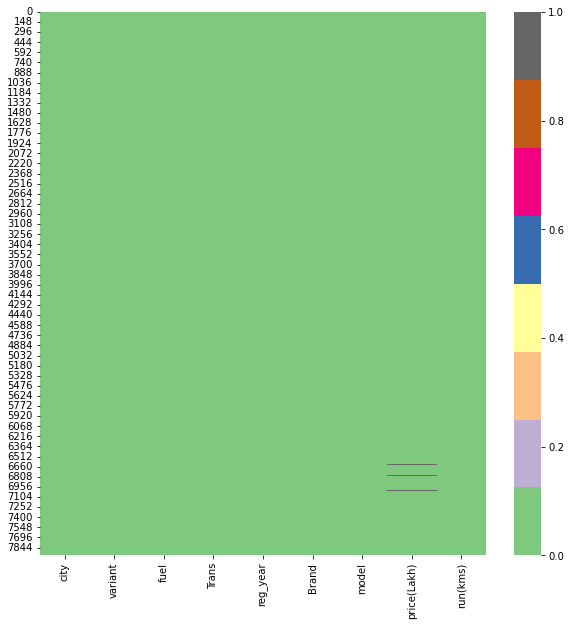

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cmap='Accent')
plt.show()

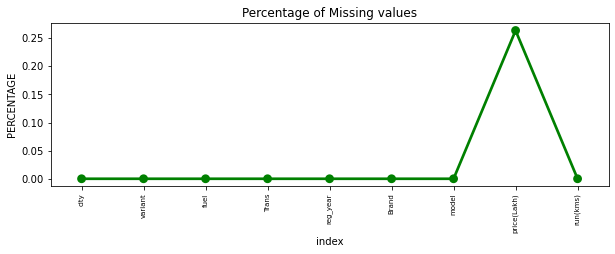

In [21]:
plt.figure(figsize=(10,3))
ax = sns.pointplot('index',0,data=misp,color='g')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [22]:
df.columns[misp[misp[0]!=0].index]

Index(['price(Lakh)'], dtype='object')

In [23]:
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True)

,city,variant,fuel,Trans,reg_year,Brand,model,price(Lakh),run(kms)
0,ahmedabad,V CVT,Petrol,Automatic,2016,Honda,Jazz,6.28,39821.0
1,ahmedabad,M8,Diesel,Manual,2018,Mahindra,Marazzo,10.15,41071.0
2,ahmedabad,Sportz,Petrol,Manual,2015,Hyundai,Grand i10,4.51,67525.0
3,ahmedabad,1.4 Limited Plus BSIV,Petrol,Automatic,2019,Jeep,Compass,16.78,32294.0
4,ahmedabad,1.2 V AT i VTEC,Petrol,Automatic,2016,Honda,Jazz,6.29,15385.0
...,...,...,...,...,...,...,...,...,...
7934,lucknow,VDi,Diesel,Manual,2018,Maruti,Vitara Brezza,6.93,94515.0
7935,lucknow,AMT VXI,Petrol,Automatic,2019,Maruti,Swift,6.20,35919.0
7936,lucknow,1.2 Revotron XT,Petrol,Manual,2019,Tata,Tiago,5.13,26641.0
7937,lucknow,V,Petrol,Manual,2011,Toyota,Etios Liva,2.43,61640.0


In [24]:
df.shape

(7939, 9)

In [25]:
cont=[]
cat=[]
for i in df.columns:
    if df[i].dtype==np.object:
        cat.append(i)
    else:
        cont.append(i)
print('Number of Numeric variables :',len(cont),'\n')
print(cont)
print("--------------------------")
print('Number of Objective  variables :',len(cat),'\n')
print(cat)

Number of Numeric variables : 3 

['reg_year', 'price(Lakh)', 'run(kms)']
--------------------------
Number of Objective  variables : 6 

['city', 'variant', 'fuel', 'Trans', 'Brand', 'model']


In [26]:
for i in cat:
    print(i,":\n")
    print(len(df[i].unique()))
    print('______________________________\n')

city :

12
______________________________

variant :

573
______________________________

fuel :

5
______________________________

Trans :

2
______________________________

Brand :

23
______________________________

model :

141
______________________________



* Distribution of continuois variables

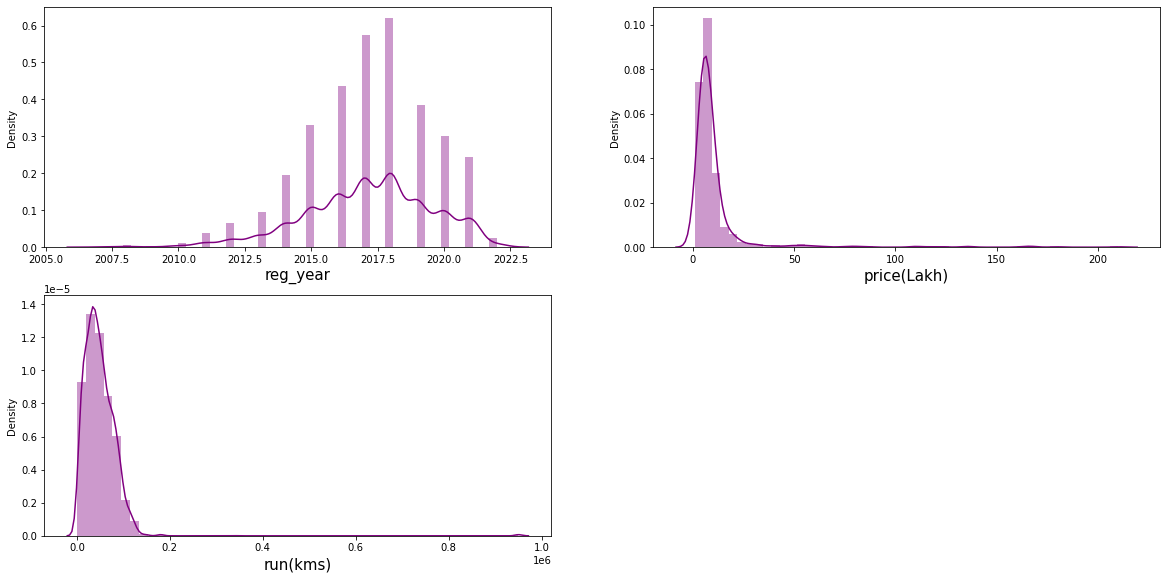

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(20,100))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(19,2,graph)
        sns.distplot(df[column],color='purple')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

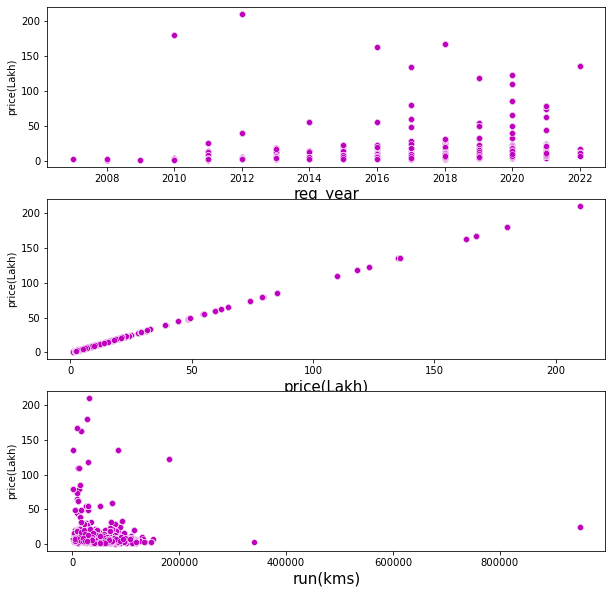

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(10,10))
sns.set_palette('bright')

graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(3,1,graph)
        sns.scatterplot(x=df[column],y=df['price(Lakh)'],color='m')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

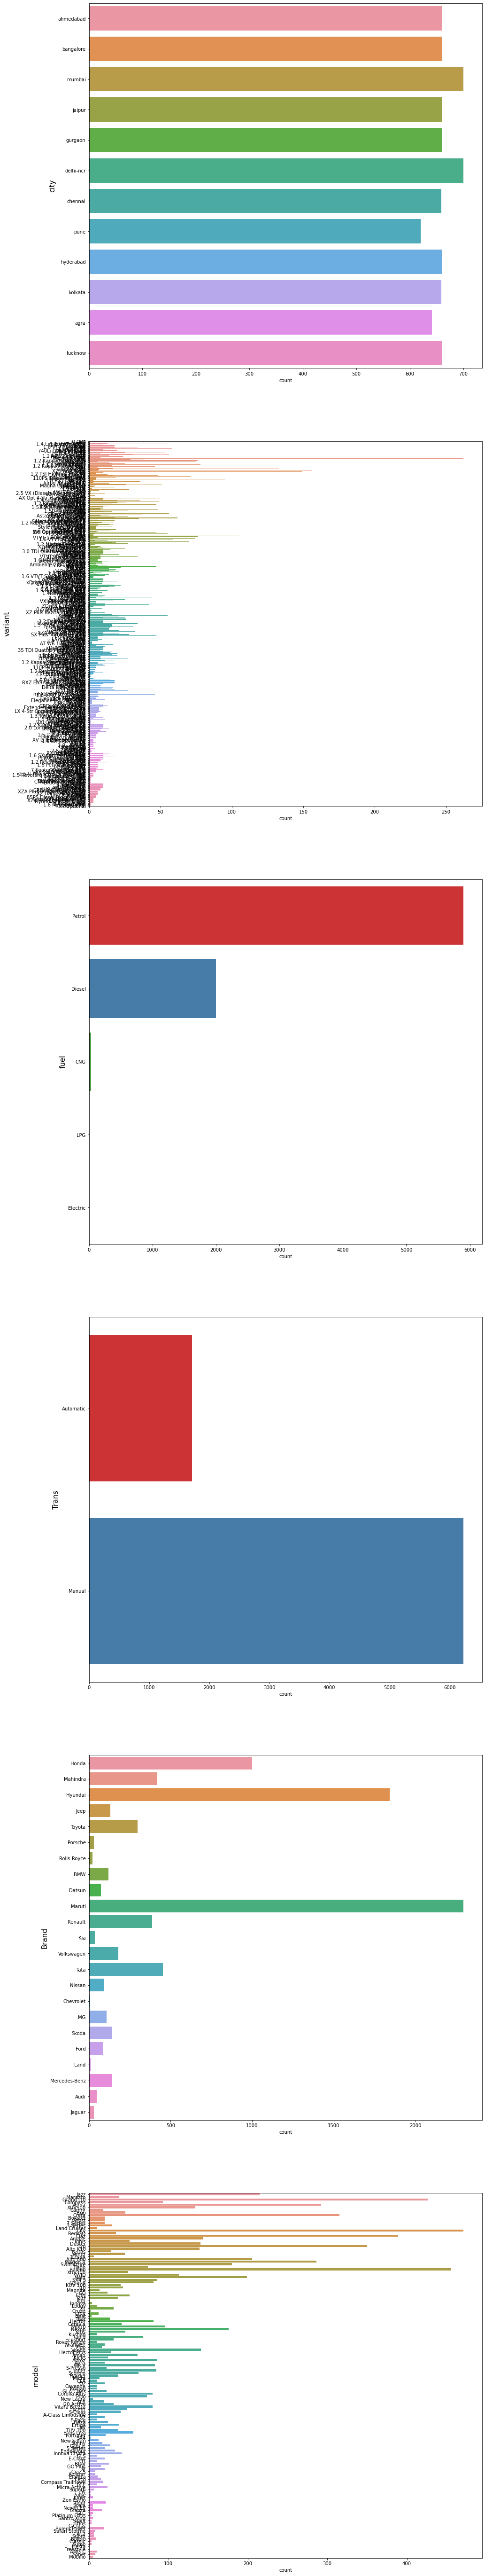

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(15,100))
sns.set_palette('Set1')

graph=1

for column in cat:
    if graph<=len(cat):
        ax=plt.subplot(6,1,graph)
        sns.countplot(y=df[column])
        plt.ylabel(column,fontsize=15)
    graph+=1
plt.show()
plt.tight_layout()

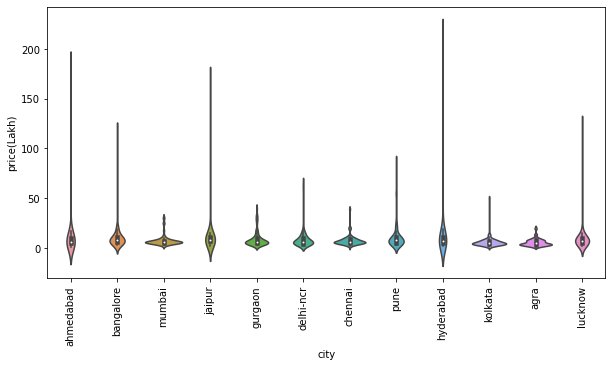

In [30]:
plt.figure(figsize=(10,5))
sns.set_palette('Set1')
plt.style.use('default')
sns.violinplot(x=df['city'],y=df['price(Lakh)'])
plt.xlabel('city',fontsize=10) 
plt.xticks(rotation='90')
plt.show()

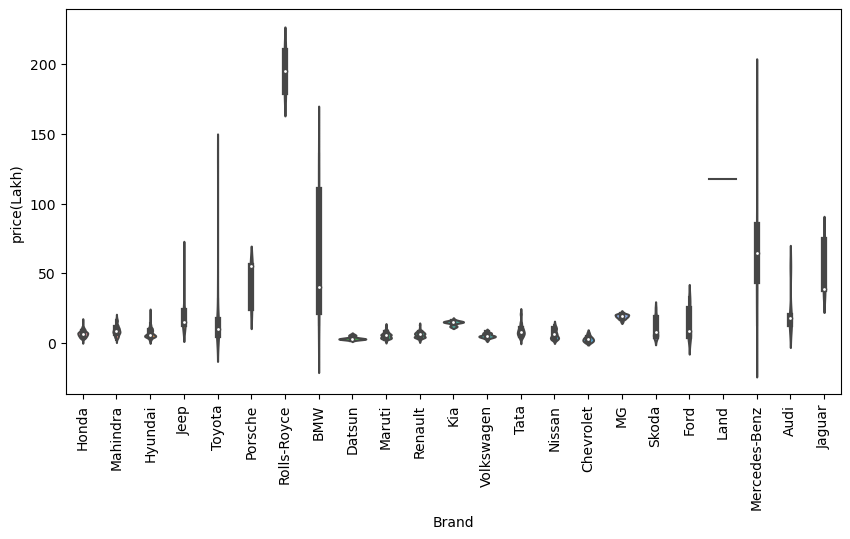

In [31]:
plt.figure(figsize=(10,5))
sns.set_palette('Set1')
plt.style.use('default')
sns.violinplot(x=df['Brand'],y=df['price(Lakh)'])
plt.xlabel('Brand',fontsize=10) 
plt.xticks(rotation='90')
plt.show()

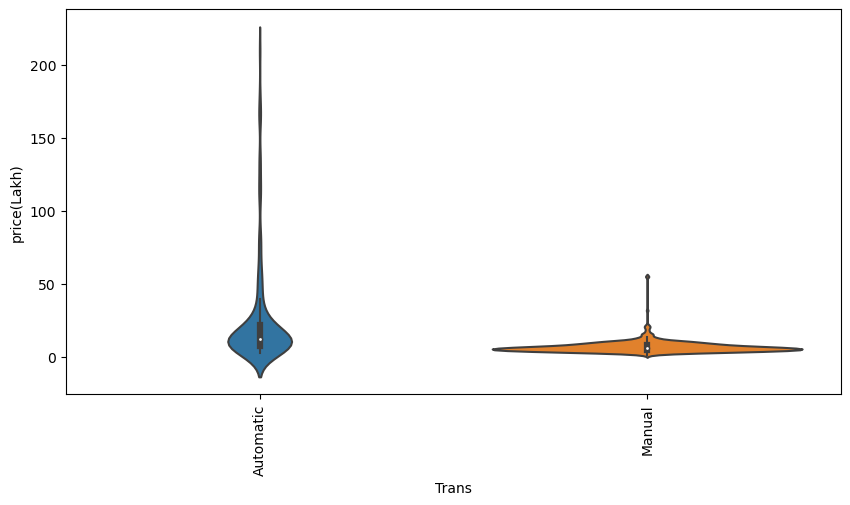

In [32]:
plt.figure(figsize=(10,5))
sns.set_palette('Set1')
plt.style.use('default')
sns.violinplot(x=df['Trans'],y=df['price(Lakh)'])
plt.xlabel('Trans',fontsize=10) 
plt.xticks(rotation='90')
plt.show()

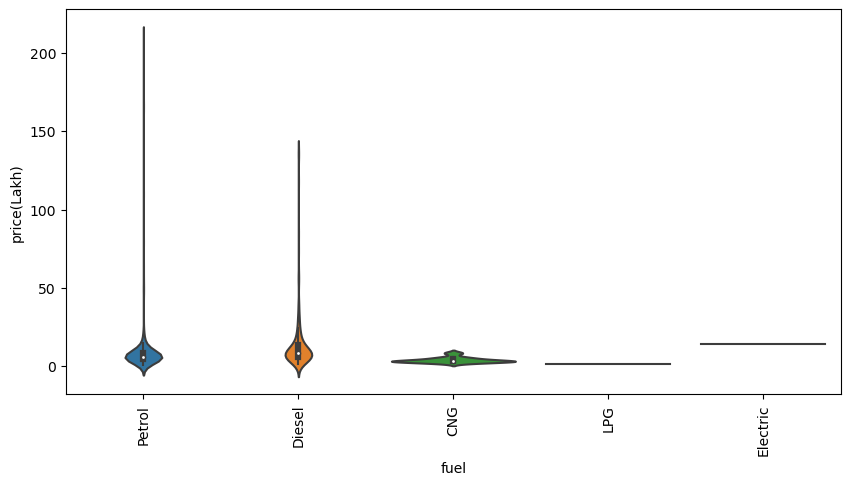

In [33]:
plt.figure(figsize=(10,5))
sns.set_palette('Set1')
plt.style.use('default')
sns.violinplot(x=df['fuel'],y=df['price(Lakh)'])
plt.xlabel('fuel',fontsize=10) 
plt.xticks(rotation='90')
plt.show()

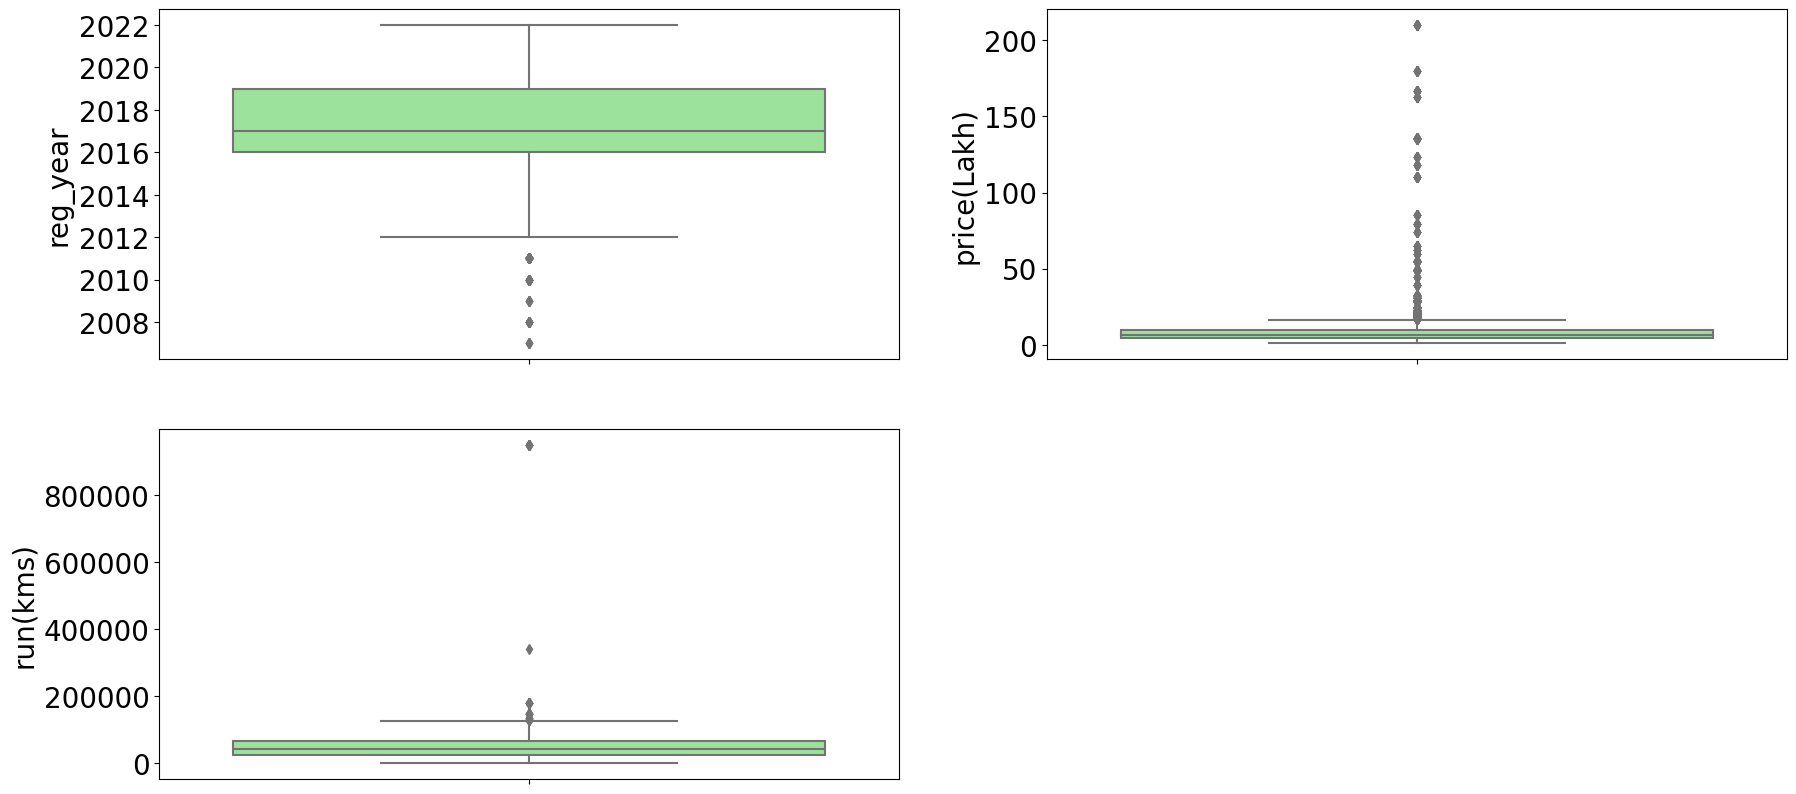

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(21,10))
sns.set_palette('bright')

graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(2,2,graph)
        sns.boxplot(y=df[column],color='lightgreen')
        plt.ylabel(column,fontsize=20)
        plt.yticks(fontsize=20)
    graph+=1
plt.show()
plt.tight_layout()

In [35]:
inf=['reg_year','run(kms)']

##### IQR method

In [36]:
data=df.copy()

In [37]:
row_before=data.shape[0]
row_before

7939

In [38]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
Quant=pd.DataFrame({'Q1':q1,'Q3':q3,'IQR':iqr,'Lower limit':lower,'Upper limit':upper})
Quant

,Q1,Q3,IQR,Lower limit,Upper limit
reg_year,2016.00,2019.00,3.00,2011.50,2023.50
price(Lakh),4.74,9.48,4.74,-2.37,16.59
run(kms),25897.50,67211.00,41313.50,-36072.75,129181.25


In [39]:
for i in data[inf].columns:
    ind=np.where(data[i]>upper[i])
    data=data.drop(data.index[ind])
    data.reset_index()
    
for i in data[inf].columns:
    inx=np.where(data[i]<lower[i])
    data=data.drop(data.index[inx])
    data.reset_index()
       

In [40]:
row_after=data.shape[0]
row_after

7751

In [41]:
loss2=((row_before-row_after)/row_before)*100
loss2

2.368056430280892

#### Z score

In [42]:
data=df.copy()
rows_before1=data.shape[0]
rows_before1

7939

In [43]:
from scipy.stats import zscore

z1=np.abs(zscore(data[inf]))
data=data[(z1<3).all(axis=1)]


In [44]:
rows_after1=data.shape[0]
rows_after1

7864

In [45]:
loss1=((rows_before1-rows_after1)/rows_before1)*100
loss1

0.9447033631439727

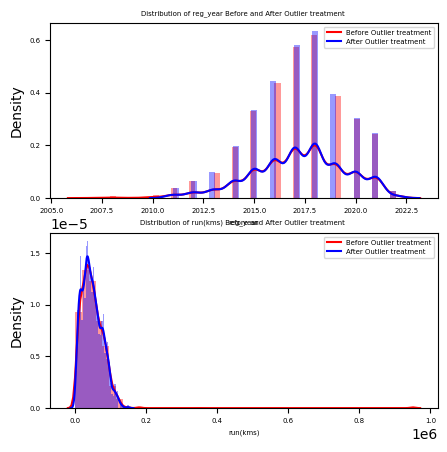

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize=(5,5))
sns.set_palette('bright')


graph=1

for column in inf:
    if graph<=len(inf):
        ax=plt.subplot(2,1,graph)
        sns.distplot(df[column],color='red')
        sns.distplot(data[column],color='blue')
        plt.xlabel(column,fontsize=5)
        plt.title("Distribution of {} Before and After Outlier treatment ".format(column),fontsize=5)
        plt.legend(['Before Outlier treatment','After Outlier treatment'],fontsize=5)
        plt.xticks(fontsize=5)
        plt.yticks(fontsize=5)
    graph+=1
plt.show()
plt.tight_layout()

* The project doesn't involve removal outliers due to:
  
  1] The outlliers are due to natural variation i population 

  
  2] The algorithms involved in training are tree base algorithms

In [47]:
df.shape

(7939, 9)

#### Encoding with LabelEncoder

In [48]:
df.head()

,city,variant,fuel,Trans,reg_year,Brand,model,price(Lakh),run(kms)
0,ahmedabad,V CVT,Petrol,Automatic,2016,Honda,Jazz,6.28,39821.0
1,ahmedabad,M8,Diesel,Manual,2018,Mahindra,Marazzo,10.15,41071.0
2,ahmedabad,Sportz,Petrol,Manual,2015,Hyundai,Grand i10,4.51,67525.0
3,ahmedabad,1.4 Limited Plus BSIV,Petrol,Automatic,2019,Jeep,Compass,16.78,32294.0
4,ahmedabad,1.2 V AT i VTEC,Petrol,Automatic,2016,Honda,Jazz,6.29,15385.0


In [49]:
df.shape

(7939, 9)

In [50]:
for i in cat:
    print(i,":\n")
    print(df[i].unique())
    print('______________________________\n')

city :

['ahmedabad' 'bangalore' 'mumbai' 'jaipur' 'gurgaon' 'delhi-ncr' 'chennai'
 'pune' 'hyderabad' 'kolkata' 'agra' 'lucknow']
______________________________

variant :

['V CVT' 'M8' 'Sportz' '1.4 Limited Plus BSIV' '1.2 V AT i VTEC'
 '1.6 VTVT AT SX' 'W11 BSIV' '2.5 G' '1.6 VTVT S Option' 'S MT' 'W8 FWD'
 '1.6 CRDi SX' '3.0' 'Standard' '740Li DPE Signature' '330i M Sport' 'VX'
 '1.4 Limited' 'i-VTEC CVT ZX' 'T' 'ZDi' 'S i-Vtech' '1.2 AMT Zeta BSIV'
 'Petrol RXS CVT' 'T Option' 'RXZ Turbo CVT' 'Asta 1.4 CRDi' 'VXI'
 'Petrol RxL' 'W6 2WD' '1.2 Kappa Sportz BSIV' 'VTVT 1.6 SX' 'VX CVT'
 'GTX Plus' '1.2 TSI Highline AT' 'ZX CVT' '1.6 VTVT SX Plus' 'AT W10 FWD'
 '1.2 Kappa Magna BSIV' 'ZXi' 'VXi Plus' 'GLS AT' '1.2 Asta' 'LXI'
 'VXI AMT 1.2' 'VXI BS IV' 'XZ Plus Diesel' '1.2 Delta' 'W6' '1.4 Delta'
 '1.2 TSI Highline Plus AT' 'X' 'i VTEC CVT SV' 'LXI BS IV' 'RXL'
 'Sportz 1.2' 'RXL BSVI' '110PS Diesel RxS AMT' 'DDiS 200 Delta' 'ZXI'
 'D75 K2' '1.0 RXT Opt BSIV' 'VXI 1.2' 'Magna' 'Turb

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    df[i]=le.fit_transform(df[i])
 

In [52]:
for i in cat:
    print(i,":\n")
    print(df[i].unique())
    print('______________________________\n')

city :

[ 1  2 10  7  5  4  3 11  6  8  0  9]
______________________________

variant :

[425 326 402  84  59 141 474 173 146 366 482 122 185 409 207 196 443  82
 557 411 519 371  12 339 413 358 238 451 341 477  31 440 446 297  57 526
 148 226  28 536 469 295  14 316 455 457 509  24 475  79  58 486 545 317
 347 404 348 156 263 528 262   4 452 327 422 412 333 282  56 332  55 330
 321  69  53 432 312 501 479 459 175 214 568 310 311 172 308 363 229  68
 399  85 153 483 240  15 465  48 424  74 566   8 108 107 186 193 353 268
 387 119 450 393  27 236 400 349 245   5 209 426  60  37 118 431 232 396
 439  32 542 512  43 212 390 382 410 414 442 453 354  64 394 484 533 546
  44 429 462  65 447 562 183 438  13 142 233 215 302 549 553 537 144  40
  99 373 556 508 337 218 237 496 234 181 189 365 166 182 569 145 491 249
 441  41  75 558 294 388 129 272 128  73 529 325 104 235 100 480 231 220
  52 521 530 370  67 427 372  21 345 112  16 137  92 149 244  11 331 499
 391   9 376 334 216 572 161   1 49

In [53]:
df.head()

,city,variant,fuel,Trans,reg_year,Brand,model,price(Lakh),run(kms)
0,1,425,4,0,2016,5,69,6.28,39821.0
1,1,326,1,1,2018,12,79,10.15,41071.0
2,1,402,4,1,2015,6,61,4.51,67525.0
3,1,84,4,0,2019,8,33,16.78,32294.0
4,1,59,4,0,2016,5,69,6.29,15385.0


#### correlation matrix

In [54]:
cor=df.corr().abs()

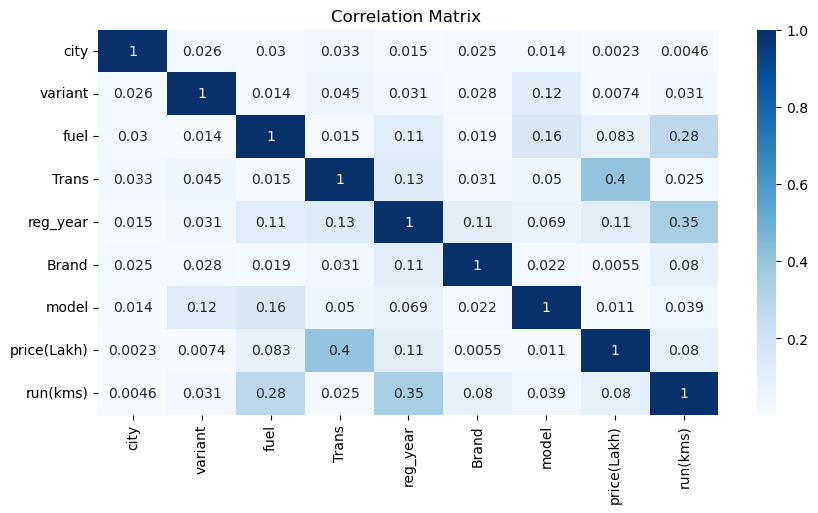

In [55]:
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap='Blues')
plt.title("Correlation Matrix ")
plt.show()

* Correlation with Target Feature

In [56]:
cor_label=(df.drop('price(Lakh)',axis=1)).corrwith(df['price(Lakh)']).abs()
cor_label

city        0.002313
variant     0.007437
fuel        0.082614
Trans       0.401959
reg_year    0.109886
Brand       0.005531
model       0.010894
run(kms)    0.080443
dtype: float64

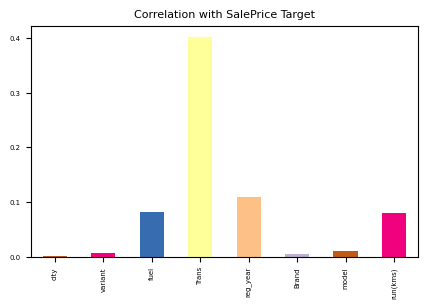

In [57]:
plt.figure(figsize=(5,3))
cor_label.plot(kind="bar",color=sns.color_palette('Accent_r'))
plt.title("Correlation with SalePrice Target",fontsize=8)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

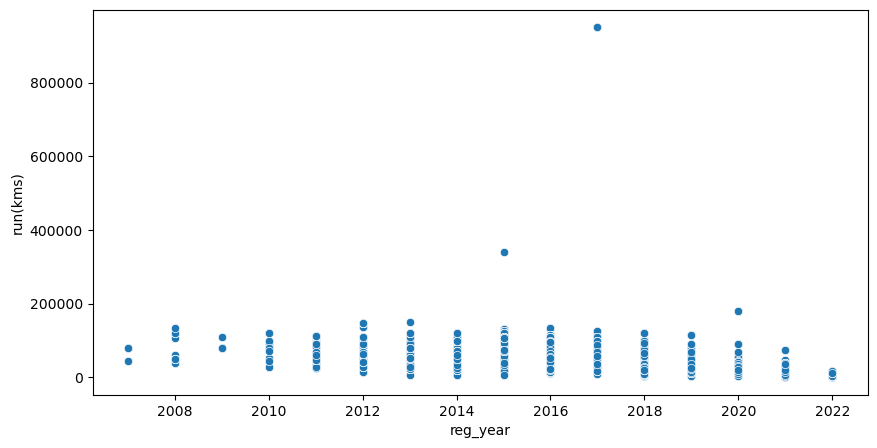

In [58]:
plt.figure(figsize=(10,5))
sns.set_palette('Set1')
plt.style.use('default')
sns.scatterplot(x=df['reg_year'],y=df['run(kms)'])
plt.xlabel('reg_year',fontsize=10) 
plt.show()

* Multicollinearity with VIF

In [59]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

Predictors1=df.drop(columns=['price(Lakh)'],axis=1)
predictor1=Predictors1.to_numpy()

VIF1=pd.DataFrame()
VIF1["Features"]=Predictors1.columns
VIF1["vif_scores"]=[variance_inflation_factor(predictor1,i) for i in range(Predictors1.shape[1])]
VIF1.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
4,reg_year,27.214314
2,fuel,7.797965
5,Brand,5.109763
3,Trans,4.672998
1,variant,3.876287
6,model,3.641569
0,city,3.583648
7,run(kms),2.524742


In [60]:
Predictors2=df.drop(columns=['price(Lakh)','reg_year'],axis=1)
predictor2=Predictors2.to_numpy()
VIF2=pd.DataFrame()
VIF2["Features"]=Predictors2.columns
VIF2["vif_scores"]=[variance_inflation_factor(predictor2,i) for i in range(Predictors2.shape[1])]
VIF2.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
2,fuel,4.940996
3,Trans,4.227073
4,Brand,4.173260
1,variant,3.513377
0,city,3.277254
5,model,3.239323
6,run(kms),2.118377


* Skewnes analysis

In [61]:
df[inf].skew()

reg_year    -0.495958
run(kms)    11.869860
dtype: float64

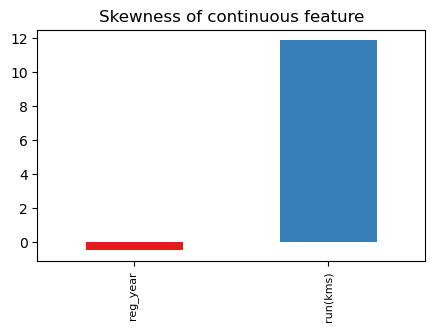

In [62]:
plt.figure(figsize=(5,3))
df[inf].skew().plot.bar(color=sns.color_palette('Set1'))
plt.title('Skewness of continuous feature')
plt.xticks(fontsize=8)

plt.show()

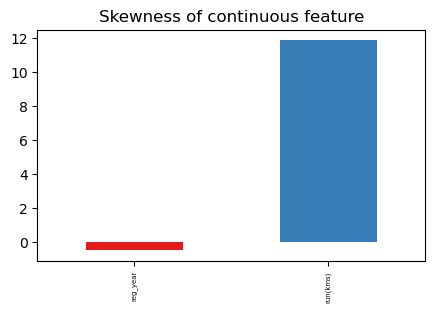

In [63]:
plt.figure(figsize=(5,3))
df[inf].skew().plot.bar(color=sns.color_palette('Set1'))
plt.title('Skewness of continuous feature')
plt.xticks(fontsize=5)
plt.show()

In [64]:
data=df.copy()
data.shape

(7939, 9)

In [65]:
data[inf].skew()

reg_year    -0.495958
run(kms)    11.869860
dtype: float64

* As I will use tree based algorithms hence skewness can be keep, which will not affect performance of models.

* Splitting data

In [66]:
x1=df.drop(['price(Lakh)'],axis=1)
y1=df['price(Lakh)']

In [67]:
print('x1 shape is ',x1.shape)
print('y1 shape is ',y1.shape)

x1 shape is  (7939, 8)
y1 shape is  (7939,)


### standardization

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x1)

In [69]:
x_scaled.shape

(7939, 8)

## PCA
Dimesionlaity reduction is applied due to :
 
 1] The correlation of features with target variable is very low order of less than 0.1
 
 2] The vif score obtained for reg_year due to multicollinearity exists between reg_year variable and other varibale
 
 3] The reg_year is one of correlated variable with target among all variable with 0.109
 
 4] The reg_year and run variable has moderate correlation amog them 0.35

In [70]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[-0.14682006,  0.07340238, -0.29222045, ...,  0.24713884,
         1.20214915, -0.37167938],
       [ 0.64985588, -0.83409618,  0.18377933, ..., -0.22368125,
        -1.00985471, -0.46818847],
       [ 0.7737618 , -0.10195587, -1.74657649, ...,  0.24590968,
         0.38852655,  0.06899554],
       ...,
       [-1.0355035 , -0.07924814,  0.95557407, ..., -1.38096081,
         0.39947992,  0.5529015 ],
       [ 0.92428666,  0.23240303, -0.46172584, ...,  1.5199654 ,
         1.84414778, -1.08932919],
       [-0.11268354, -0.18725251,  0.01617899, ...,  0.56197763,
         0.64695334,  0.0168921 ]])

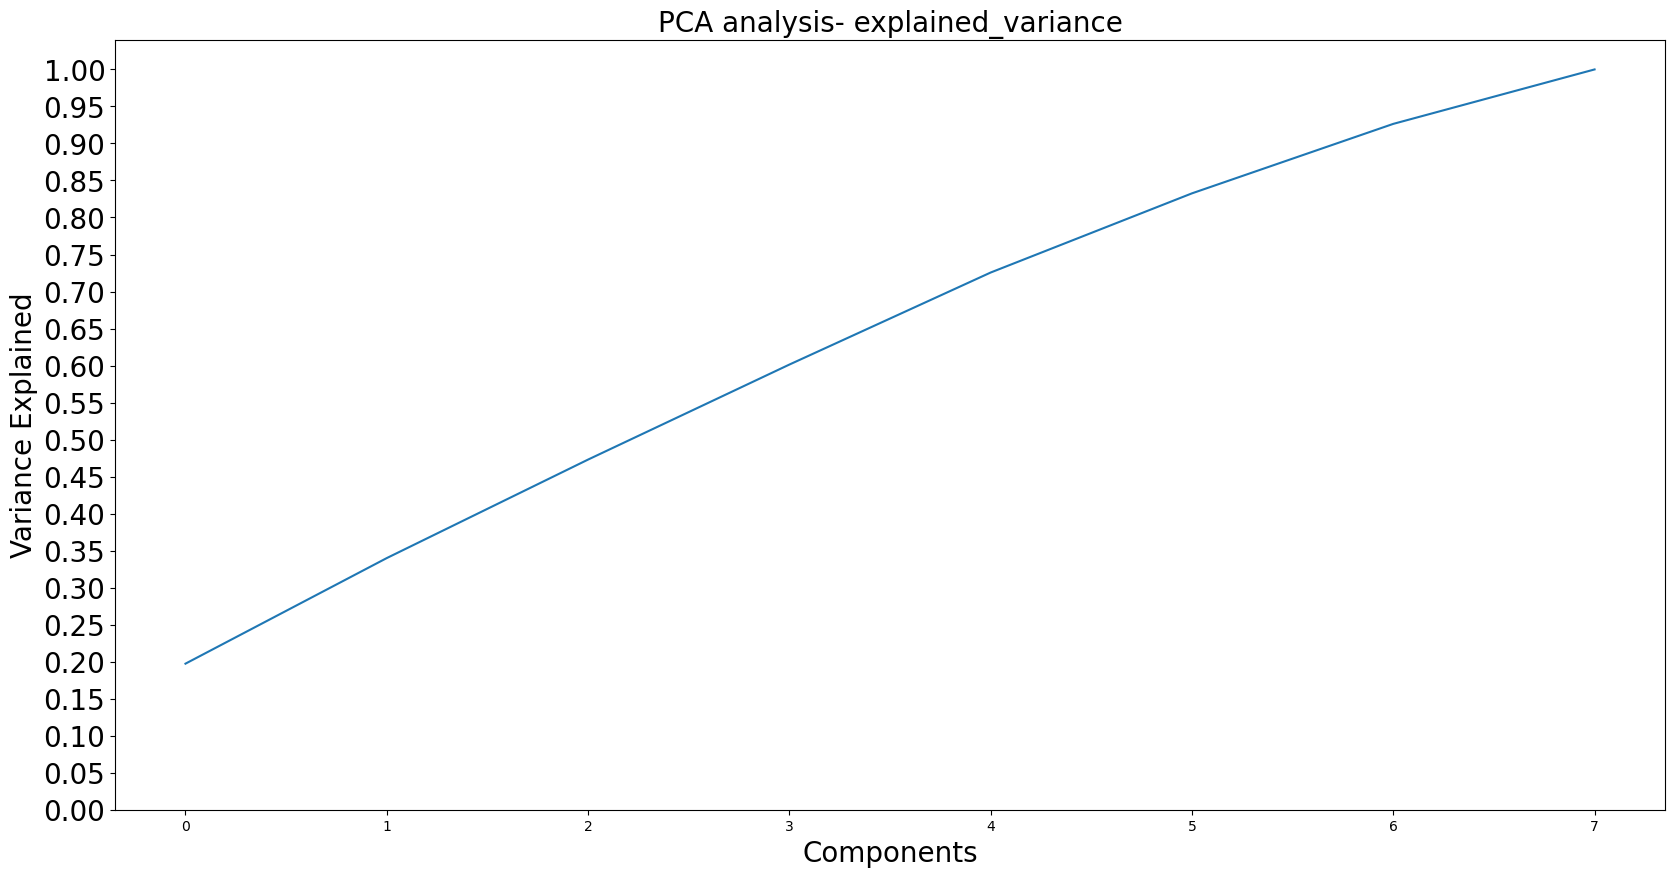

In [71]:
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components',fontsize=20)
plt.ylabel('Variance Explained',fontsize=20)
plt.title('PCA analysis- explained_variance',fontsize=20)
plt.yticks(np.arange(0,1.05,0.05),fontsize=20)
plt.xticks(range(0,8),fontsize=10)
plt.show()

In [72]:
pd.DataFrame(data=np.cumsum(pca.explained_variance_ratio_))

,0
0,0.197316
1,0.339935
2,0.472984
3,0.601328
4,0.725670
5,0.832616
6,0.926454
7,1.000000


In [73]:
pca1=PCA(n_components=8) 
dim1=pca1.fit_transform(x_scaled)
x_dim1=pd.DataFrame(dim1,columns=[('PC{}').format(i) for i in range(1,9)])
x_dim1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.146820,0.073402,-0.292220,2.270100,0.913341,0.247139,1.202149,-0.371679
1,0.649856,-0.834096,0.183779,-0.285134,1.608788,-0.223681,-1.009855,-0.468188
2,0.773762,-0.101956,-1.746576,0.652880,0.559190,0.245910,0.388527,0.068996
3,-1.300585,1.523983,0.293782,1.431377,1.494501,-0.551458,0.407209,0.138276
4,-0.539678,1.348589,-0.093192,1.761712,1.036311,-1.311155,1.029939,-0.693548
...,...,...,...,...,...,...,...,...
7934,1.517441,-1.350815,1.396463,-0.524736,-0.576751,0.243171,-0.850432,0.476064
7935,-1.056828,0.068813,1.815159,0.725036,-0.688497,-0.610136,1.027618,0.399217
7936,-1.035504,-0.079248,0.955574,-1.892768,-0.728675,-1.380961,0.399480,0.552902
7937,0.924287,0.232403,-0.461726,-1.857143,-1.116954,1.519965,1.844148,-1.089329


In [74]:
x_dim1.shape

(7939, 8)

In [75]:
y1.shape

(7939,)

In [76]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score 
from sklearn.model_selection import cross_val_score

In [77]:
maxR2=0
maxRn=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_dim1,y1,test_size=0.3,random_state=i)
    regr=DecisionTreeRegressor(random_state=10)
    regr.fit(x_train,y_train)
    r2=regr.score(x_test,y_test)
    print("R squared ",r2,'Random sate ',i)
    
    if r2>maxR2:
        maxR2=r2
        maxRn=i
        print("R-squared",maxR2,"random_state",i)
        

R squared  0.9960815624402289 Random sate  1
R-squared 0.9960815624402289 random_state 1
R squared  0.9994000043136817 Random sate  2
R-squared 0.9994000043136817 random_state 2
R squared  0.9987690601552335 Random sate  3
R squared  0.9981456312976208 Random sate  4
R squared  0.9847419677321515 Random sate  5
R squared  0.9956280401861058 Random sate  6
R squared  0.9879137363461097 Random sate  7
R squared  0.998232537223869 Random sate  8
R squared  0.9959625052607309 Random sate  9
R squared  0.9927551237793374 Random sate  10
R squared  0.9784975132850025 Random sate  11
R squared  0.9991158484656876 Random sate  12
R squared  0.9869802341051993 Random sate  13
R squared  0.988100042133038 Random sate  14
R squared  0.9965565286008281 Random sate  15
R squared  0.9988838783199789 Random sate  16
R squared  0.9872214742985351 Random sate  17
R squared  0.9875298679460486 Random sate  18
R squared  0.9985546904369643 Random sate  19
R squared  0.9987602186265297 Random sate  20
R s

In [78]:
print("Maximum R squared obtained  is ",maxR2,'at random state',maxRn) 

Maximum R squared obtained  is  0.9995795718372201 at random state 155


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x_dim1,y1,test_size=0.3,random_state=155)

In [80]:
def Reg_eval(regr,x_train,y_train,x_test,y_test,train=True):
    if train==True:
        print('********** Training Evaluation *******************')
        ytrain_pred=regr.predict(x_train)
        
        R2_train=r2_score(y_train,ytrain_pred)
        RMSE_train=np.sqrt(mean_squared_error(y_train,ytrain_pred))
        print("\nThe R squared  for Train data  is {} ".format(R2_train))
        print("-"*60)
        print("\nThe RMSE for Train data is {} ".format(RMSE_train))
        
        
        
    elif train==False:
        print('\n********** Testing  Evaluation *******************')
        ytest_pred=regr.predict(x_test)
        R2_test=r2_score(y_test,ytest_pred)
        RMSE_test=np.sqrt(mean_squared_error(y_test,ytest_pred))
        MSE_test=mean_squared_error(y_test,ytest_pred)
        MAE_test=mean_absolute_error(y_test,ytest_pred)
        print(" \nThe R squared  for Test data is {} ".format(R2_test))
        print("-"*60)
        print("\nThe RMSE for  Test data  is {} ".format(RMSE_test))
        print("-"*60)
        print("\nThe  MSE for Test data  is {} ".format(MSE_test))
        print("-"*60)
        print("\nThe MAE for Test data  is {} ".format(MAE_test))
        print("-"*60)
        
def Reg_plot(regr,x_test,y_test):

    sns.set_palette(['red','lightgreen'])
    y_pred_test=regr.predict(x_test)
    fig=plt.figure(figsize=(15,10))
    fig.add_subplot(2,2,1)
    ax1=sns.scatterplot(x=y_test,y=y_test)
    sns.scatterplot(x=y_test,y=y_pred_test,ax=ax1)
    plt.xlabel("Actual Sales",fontsize=10)
    plt.xticks(fontsize=10)
    plt.ylabel("Predicted sales",fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(["Actual Price","Predicted Predicted"])
    plt.title("{} Prediction VS Actual data".format(type(regr)),fontsize=10)
   
    fig.add_subplot(2,2,2)
    sns.distplot(y_test-y_pred_test)
    plt.title("Distribution of Residuals in actual and Predicted values",fontsize=10)
    plt.xlabel('Errors',fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    fig.add_subplot(2,2,3)
 
    ax2=sns.kdeplot(y_test)
    sns.kdeplot(y_pred_test,ax=ax2)
    plt.title("Distribution of actual and Predicted values",fontsize=10) 
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.legend(["Actual Price","Predicted Predicted"])
    
    plt.show()

* Linear regression

In [81]:
Lr1=LinearRegression()
Lr1.fit(x_train,y_train)

Reg_eval(Lr1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(Lr1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared  for Train data  is 0.18331436303525084 
------------------------------------------------------------

The RMSE for Train data is 16.791117985089382 

********** Testing  Evaluation *******************
 
The R squared  for Test data is 0.16200684400350596 
------------------------------------------------------------

The RMSE for  Test data  is 17.87098748706833 
------------------------------------------------------------

The  MSE for Test data  is 319.3721937629528 
------------------------------------------------------------

The MAE for Test data  is 6.810272862853084 
------------------------------------------------------------


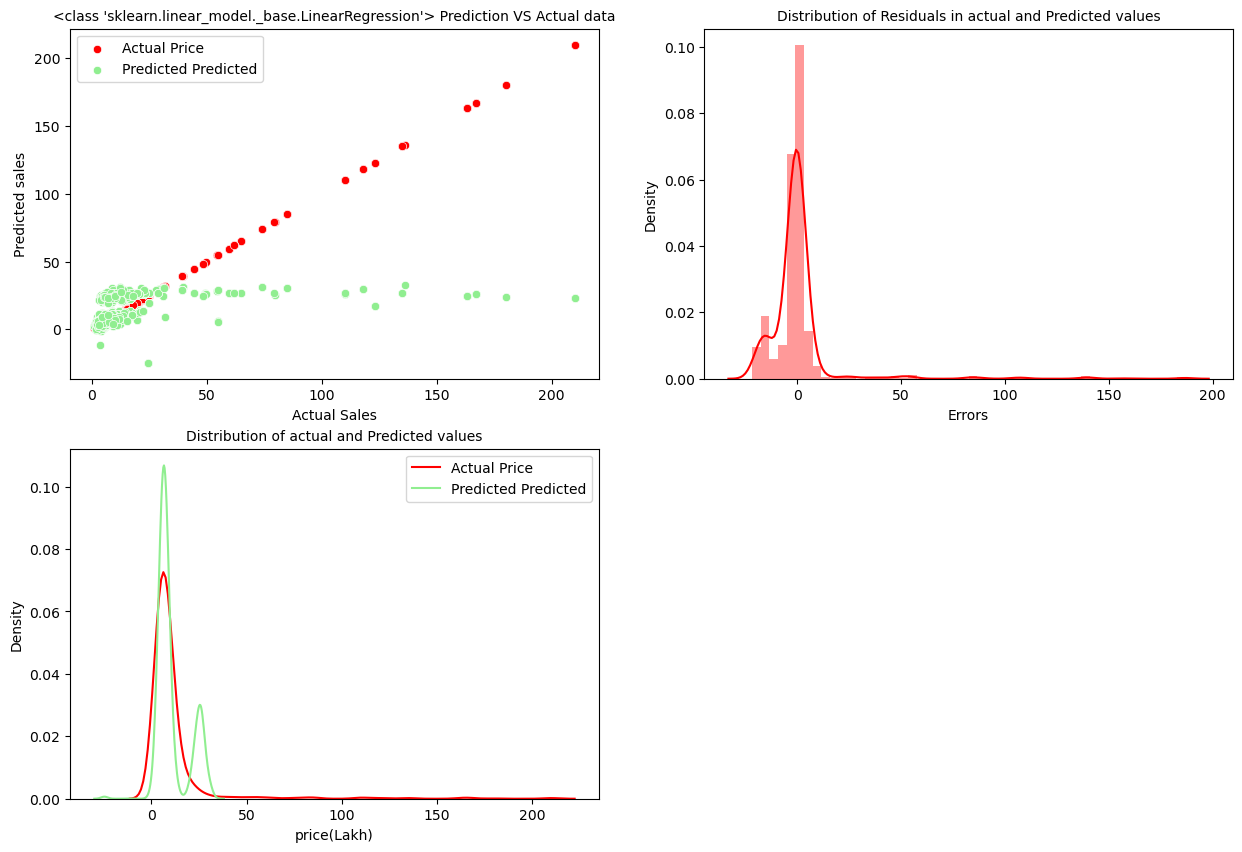

In [82]:
Reg_plot(Lr1,x_test,y_test)

* Decision Tree regressor

In [83]:
dt1=DecisionTreeRegressor()
dt1.fit(x_train,y_train)

Reg_eval(dt1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(dt1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared  for Train data  is 1.0 
------------------------------------------------------------

The RMSE for Train data is 8.391455066585723e-16 

********** Testing  Evaluation *******************
 
The R squared  for Test data is 0.9947162655429048 
------------------------------------------------------------

The RMSE for  Test data  is 1.4190536220311873 
------------------------------------------------------------

The  MSE for Test data  is 2.0137131821998318 
------------------------------------------------------------

The MAE for Test data  is 0.08319899244332521 
------------------------------------------------------------


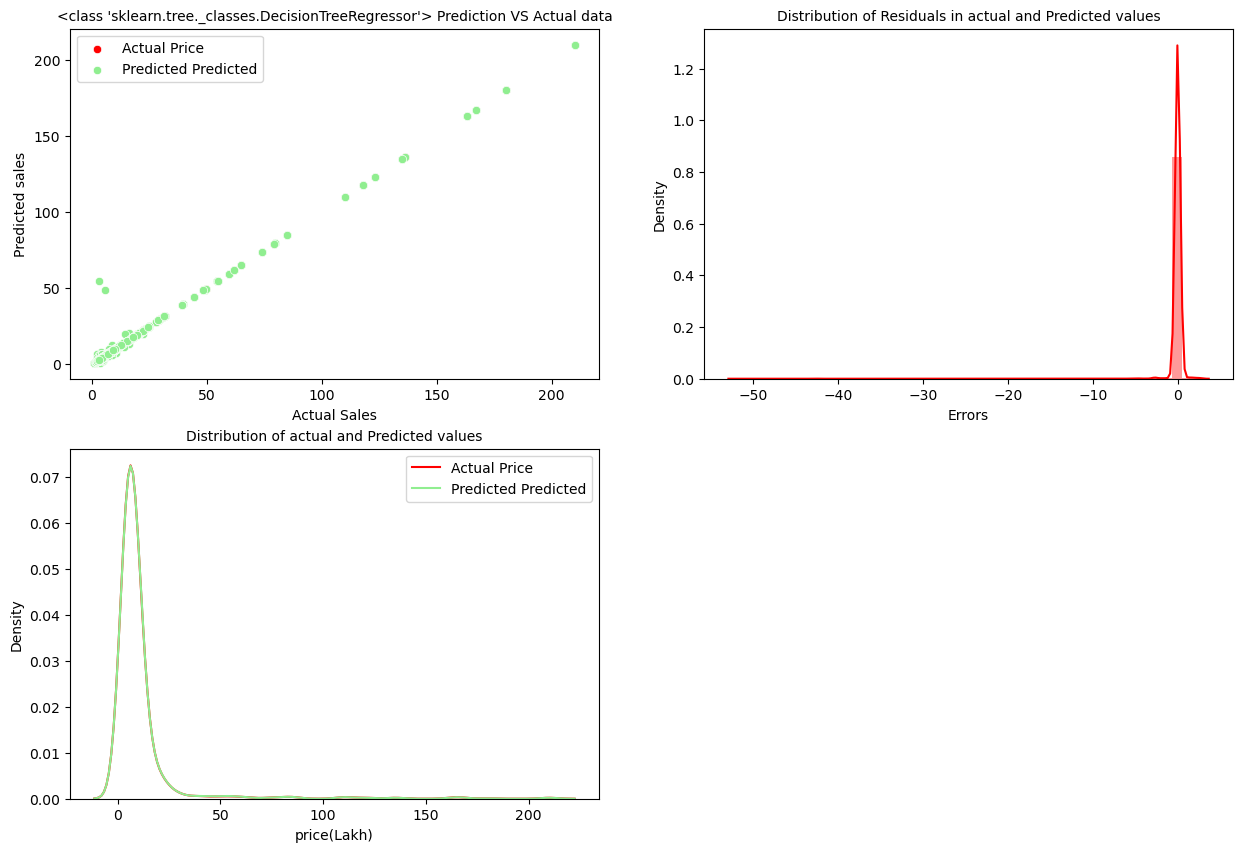

In [84]:
Reg_plot(dt1,x_test,y_test)

* GradientBoosting trgressor

In [85]:
gbdt1=GradientBoostingRegressor(learning_rate=0.1,min_samples_split=35,max_depth=5,min_samples_leaf=2,random_state=10)
gbdt1.fit(x_train,y_train)

Reg_eval(gbdt1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(gbdt1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared  for Train data  is 0.9752928976147355 
------------------------------------------------------------

The RMSE for Train data is 2.920539348463467 

********** Testing  Evaluation *******************
 
The R squared  for Test data is 0.9723753081859103 
------------------------------------------------------------

The RMSE for  Test data  is 3.244718580329712 
------------------------------------------------------------

The  MSE for Test data  is 10.528198665536861 
------------------------------------------------------------

The MAE for Test data  is 1.9216901457508344 
------------------------------------------------------------


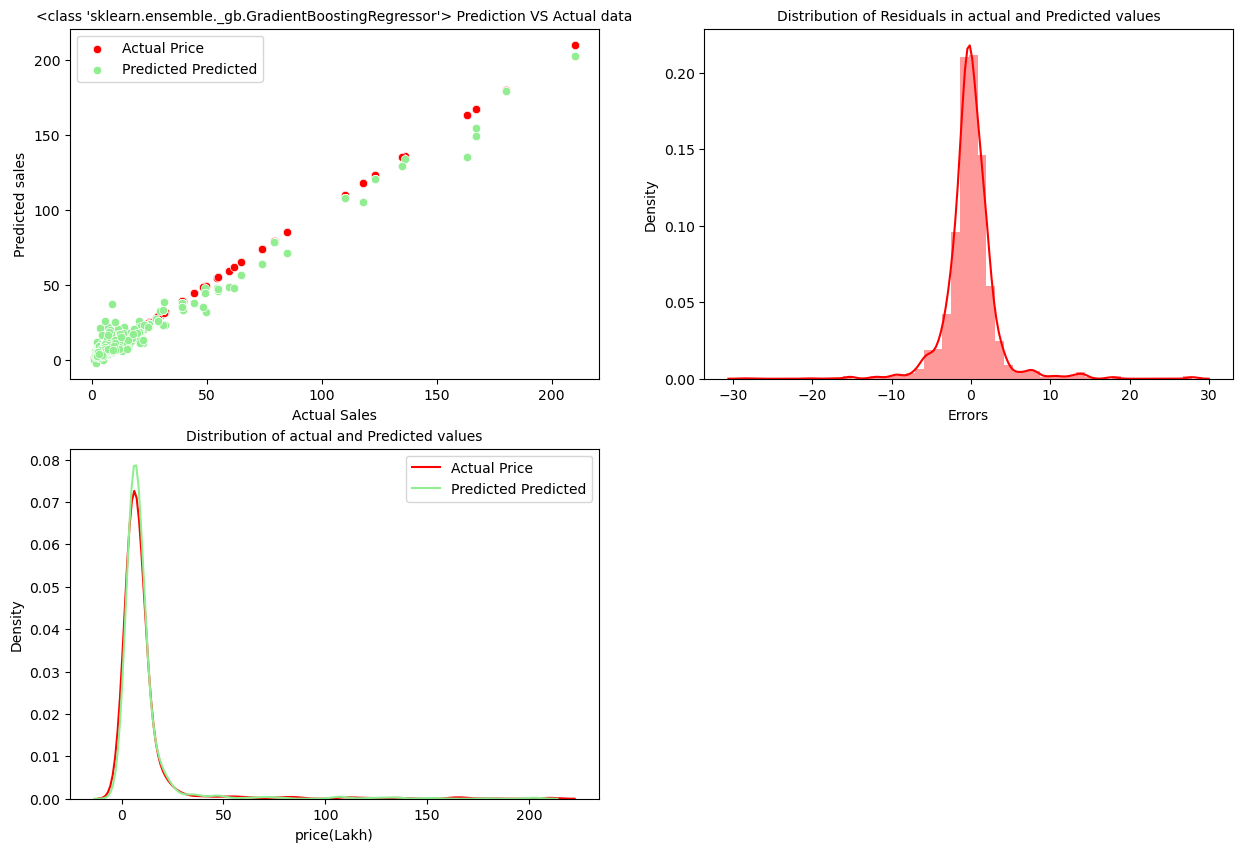

In [86]:
Reg_plot(gbdt1,x_test,y_test)

* RandomForestRegressor

In [87]:
rf1=RandomForestRegressor(max_depth=7,criterion='squared_error',min_samples_leaf=10,min_samples_split=15)
rf1.fit(x_train,y_train)

Reg_eval(rf1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(rf1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared  for Train data  is 0.8012012670261782 
------------------------------------------------------------

The RMSE for Train data is 8.284359950539729 

********** Testing  Evaluation *******************
 
The R squared  for Test data is 0.7600096953882417 
------------------------------------------------------------

The RMSE for  Test data  is 9.563682799753837 
------------------------------------------------------------

The  MSE for Test data  is 91.46402869430739 
------------------------------------------------------------

The MAE for Test data  is 3.7222002321185945 
------------------------------------------------------------


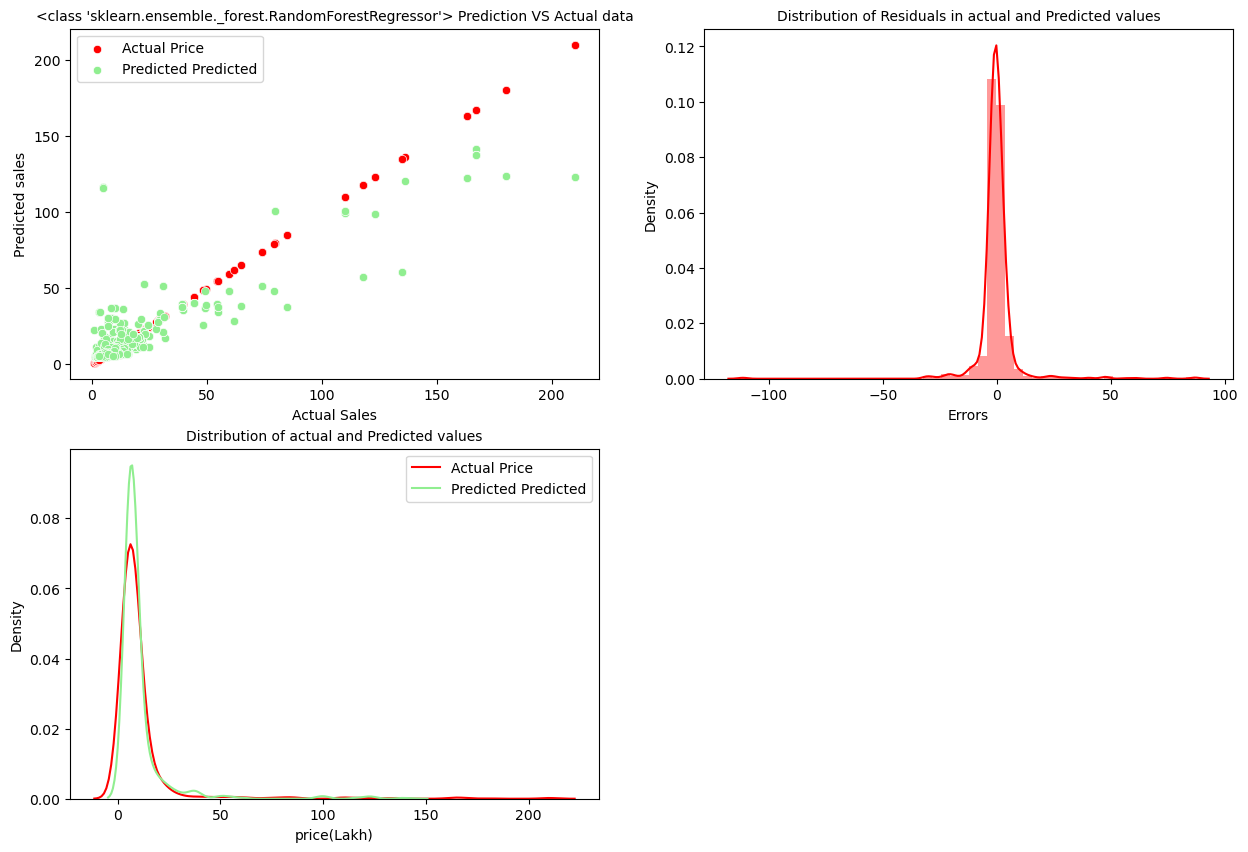

In [88]:
Reg_plot(rf1,x_test,y_test)

* XGBRegressor

In [89]:
xgr1=XGBRegressor(booster='gbtree',learning_rate=0.05,random_state=155,max_depth=9,gamma=0.1,reg_alpha=0.005)

xgr1.fit(x_train,y_train)

Reg_eval(xgr1,x_train,y_train,x_test,y_test,train=True)
Reg_eval(xgr1,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared  for Train data  is 0.997281017293798 
------------------------------------------------------------

The RMSE for Train data is 0.9688473976188188 

********** Testing  Evaluation *******************
 
The R squared  for Test data is 0.9934896574353073 
------------------------------------------------------------

The RMSE for  Test data  is 1.5751801686262659 
------------------------------------------------------------

The  MSE for Test data  is 2.4811925636334715 
------------------------------------------------------------

The MAE for Test data  is 0.8004760413946573 
------------------------------------------------------------


In [90]:
cross_val_score(xgr1,x_dim1,y1,cv=10).mean()

0.6907905240247673

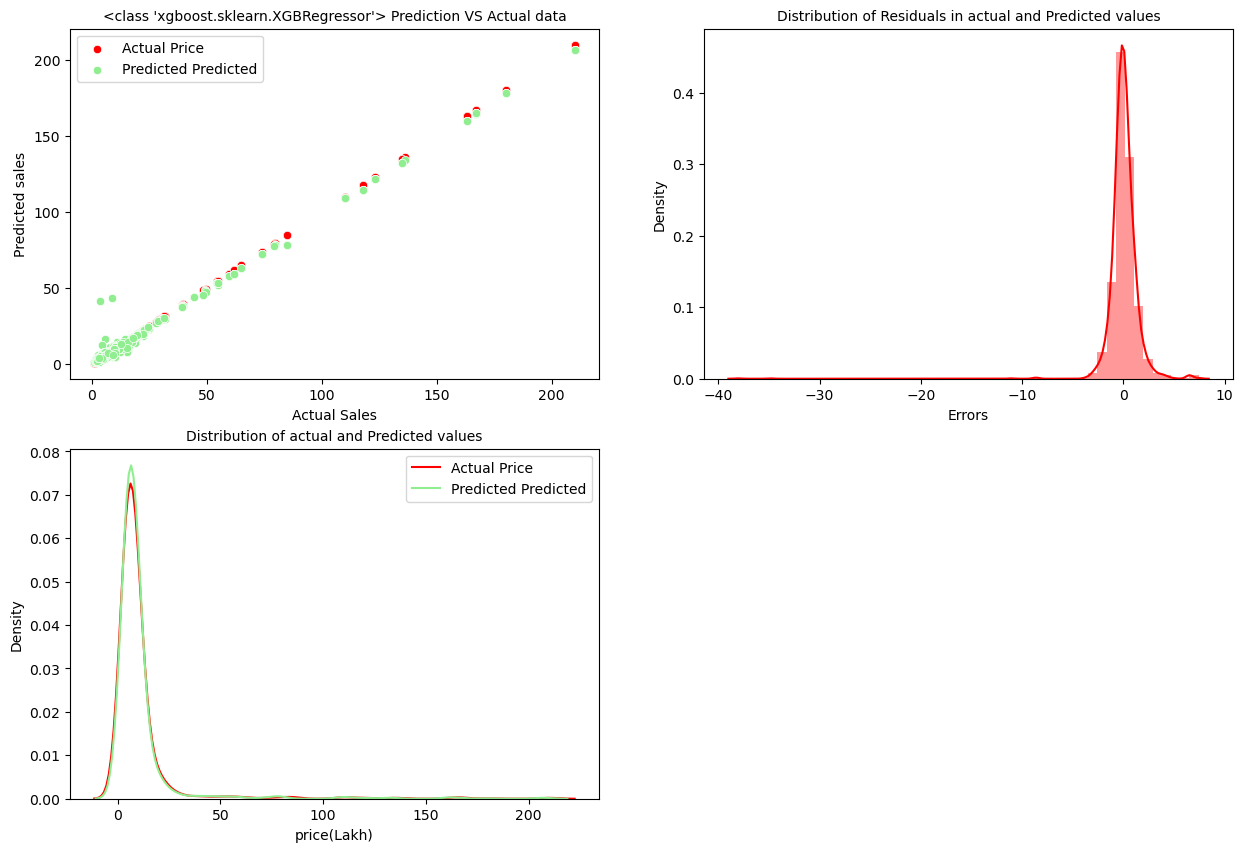

In [91]:
Reg_plot(xgr1,x_test,y_test)

* Model Evaluations

In [92]:
regressors=[dt1,gbdt1,xgr1,rf1]
Names=["DecisionTreeRegressor",'GBDTRegressor',
       'XGBRegressor',"RandomForestRegressor"]

In [93]:
scores_train= []
scores_test=[]
rmse_scores=[]
for reg in regressors:
    ypred_train=reg.predict(x_train)
    ypred_test=reg.predict(x_test)
    trainsc = r2_score(y_train,ypred_train)
    testsc=r2_score(y_test,ypred_test)
    rmse=np.sqrt(mean_squared_error(y_test,ypred_test))
    
    scores_train.append(trainsc)
    scores_test.append(testsc)
    rmse_scores.append(rmse)

In [94]:
for i in [5,6,7,8,9,10]:
    cvm=cross_val_score(DecisionTreeRegressor(random_state=30),x_dim1,y1,cv=i,scoring='r2')
    print("cross validation scores  : ",cvm)
    print("R2 square is {0} for cv={1}".format(cvm.mean(),i))
    print('-'*60)

cross validation scores  :  [ 0.11866518  0.19603225  0.29711408  0.28965477 -0.57575378]
R2 square is 0.0651425021389425 for cv=5
------------------------------------------------------------
cross validation scores  :  [-0.03369746  0.04583426 -0.02898703  0.24624653 -0.30893446 -2.96918121]
R2 square is -0.5081198947457263 for cv=6
------------------------------------------------------------
cross validation scores  :  [ 0.03827964  0.80246694  0.9100032   0.96900113  0.75736633 -0.12160751
 -2.30663367]
R2 square is 0.14983943718203926 for cv=7
------------------------------------------------------------
cross validation scores  :  [-0.02368588  0.01375657  0.12181773  0.21648259 -1.5564513   0.3105142
 -6.68749883 -1.21873453]
R2 square is -1.1029749315545136 for cv=8
------------------------------------------------------------
cross validation scores  :  [-0.06801498  0.9758871   0.1023941   0.61636097  0.98774911 -0.05203491
  0.26746187 -6.9019793  -1.41391859]
R2 square is -0.6

* The cv parameter affects generalized score hence cv=10 is optimum cv

In [95]:
from sklearn.model_selection import cross_val_score
cv_scores_mean=[]

for reg in regressors:
    scr=cross_val_score(reg,x_dim1,y1,cv=10,scoring="r2").mean()
   
    cv_scores_mean.append(scr)
cv_scores_mean   

[0.34830618333453145,
 0.6062936451754639,
 0.6907905240247673,
 -0.18015030287347272]

* Table for model evaluation 

In [96]:
EvalDF=pd.DataFrame({'Regressor':Names,'Train R2 square':scores_train,'Test R2 square':scores_test,
                      'RMSE':rmse_scores,'Validation score':cv_scores_mean})


In [97]:
EvalDF["Analysing Overfitting model"]=EvalDF['Test R2 square']-EvalDF['Validation score']

In [98]:
EvalDF.sort_values(by="Analysing Overfitting model",ascending=True)

,Regressor,Train R2 square,Test R2 square,RMSE,Validation score,Analysing Overfitting model
2,XGBRegressor,0.997281,0.993490,1.575180,0.690791,0.302699
1,GBDTRegressor,0.975293,0.972375,3.244719,0.606294,0.366082
0,DecisionTreeRegressor,1.000000,0.994716,1.419054,0.348306,0.646410
3,RandomForestRegressor,0.801201,0.760010,9.563683,-0.180150,0.940160


#### Hyperparameter tunning

In [101]:
from sklearn.model_selection  import GridSearchCV

param2={'gamma':[0.01,0.05,0.1,0.5],
                 'learning_rate':[0.05,0.08,0.1,0.3],
                   'max_depth':[5,9,11,15],
        
         'reg_alpha':[0.1,0.05,0.01]}


grid2=GridSearchCV(XGBRegressor(),param_grid=param2,cv=10)
grid2.fit(x_train,y_train)  
print(grid2.best_params_)      


{'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 11, 'reg_alpha': 0.01}


In [102]:
xgr2=grid2.best_estimator_
xgr2.fit(x_train,y_train)

Reg_eval(xgr2,x_train,y_train,x_test,y_test,train=True)
Reg_eval(xgr2,x_train,y_train,x_test,y_test,train=False)

********** Training Evaluation *******************

The R squared  for Train data  is 0.9999848875645353 
------------------------------------------------------------

The RMSE for Train data is 0.07223029424404194 

********** Testing  Evaluation *******************
 
The R squared  for Test data is 0.9969832834565058 
------------------------------------------------------------

The RMSE for  Test data  is 1.0722487962496 
------------------------------------------------------------

The  MSE for Test data  is 1.149717481058716 
------------------------------------------------------------

The MAE for Test data  is 0.1269179315931351 
------------------------------------------------------------


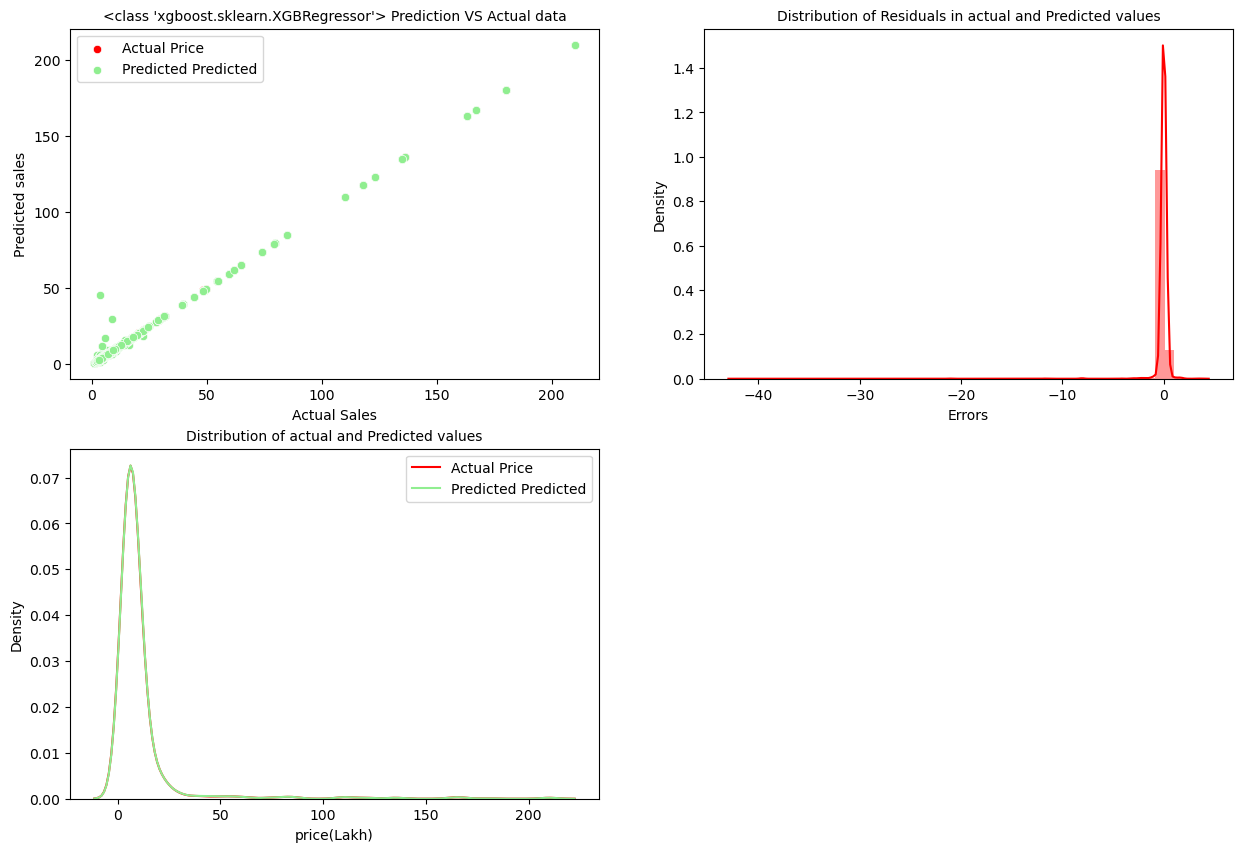

In [103]:
Reg_plot(xgr2,x_test,y_test)

##### The xgr1 is Extreme Gradient Boosting algorithm with 'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 11, 'reg_alpha': 0.01is final model.

1] R2 score for train =0.999

2] R2 score for test =0.9969

3] Root mean sqaure error for test = 1.0722

4] Mean sqaure error = 1.1497

5] Mean absolute error =0.1269

In [104]:
import joblib
joblib.dump(xgr2,"CarPrPred.pkl")


['CarPrPred.pkl']